## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [ ]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [ ]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [ ]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


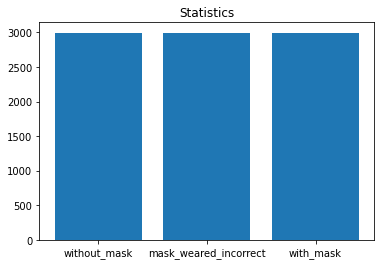

In [ ]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

In [ ]:
print(list(data_dir.glob('*/*.png')))

[PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2582.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2119.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2195.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/208.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2266.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2530.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2517.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/1943.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2062.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2321.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2353.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/28.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2027.png'), PosixPath('/content/drive/MyDrive/Mask_Dataset/without_mask/2320.p

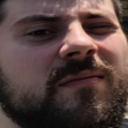

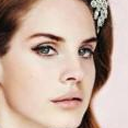

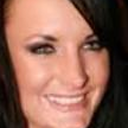

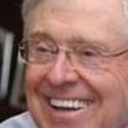

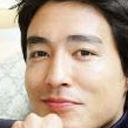

In [ ]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
c=0
for i in list(data_dir.glob('*/*.png')):
  c=c+1
  if(c>5):
    break
  img=cv2.imread(str(i))
  cv2_imshow(img)

In [ ]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
img=cv2.imread('/content/drive/MyDrive/Mask_Dataset/without_mask/2582.png')
print(img.shape)

(128, 128, 3)


In [ ]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
k=0
for i in list(data_dir.glob('*/*.png')):
  img=cv2.imread(str(i))
  if(img.shape!=(128,128,3)):
    k=k+1
print(k)

0


In [ ]:
 # If the shape is variable, reshape to a common size 
# If it is same, prove it

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [ ]:
# Choose and define base model
from tensorflow.keras.applications.vgg16 import VGG16
base_model=VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    classes=3,
    classifier_activation='softmax'
)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for x in base_model.layers:
  x.trainable=False

In [ ]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model=tf.keras.Sequential([
                           base_model,
                           Flatten(),
                           Dropout(0.2),
                           Dense(128),
                           Dense(32),
                           Dense(3,activation='softmax')
])

In [ ]:
# Add the final output layer

In [ ]:
# Print your model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 15,767,619
Trainable params: 1,052,931
Non

In [ ]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [ ]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
DataGen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=180,
    width_shift_range=(0.8,1.2),
    height_shift_range=(0.8,1.2),
    brightness_range=(0.8,1.2),
    shear_range=0.2,
    zoom_range=(0.8,1.2),
    channel_shift_range=0.2,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.1,
    dtype=None
)
# Your code 

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [ ]:
# Your code
path='/content/drive/MyDrive/Mask_Dataset/'
train_generator = DataGen.flow_from_directory(
        path,
        target_size=(128, 128),
        batch_size=32,
        subset='training',
        class_mode='categorical')
validation_generator = DataGen.flow_from_directory(
        path,
        target_size=(128, 128),
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 8085 images belonging to 3 classes.
Found 897 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [ ]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
Callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    min_lr=1e-14,
),
ModelCheckpoint('content/drive/MyDrive/FinalAssgnv1.h5',
    monitor="val_loss",
    save_best_only=True,)
]

In [ ]:
history=model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=Callbacks)

Epoch 1/100
253/253 [==============================] - 80s 266ms/step - loss: 23.3945 - accuracy: 0.8115 - val_loss: 3.3833 - val_accuracy: 0.8606 - lr: 0.0100
Epoch 2/100
253/253 [==============================] - 66s 260ms/step - loss: 2.5525 - accuracy: 0.8644 - val_loss: 2.7074 - val_accuracy: 0.8294 - lr: 0.0100
Epoch 3/100
253/253 [==============================] - 66s 260ms/step - loss: 3.9146 - accuracy: 0.8688 - val_loss: 7.1661 - val_accuracy: 0.7926 - lr: 0.0100
Epoch 4/100
253/253 [==============================] - 66s 259ms/step - loss: 5.0850 - accuracy: 0.8672 - val_loss: 3.3345 - val_accuracy: 0.8807 - lr: 0.0100
Epoch 5/100
253/253 [==============================] - 66s 262ms/step - loss: 8.2929 - accuracy: 0.8581 - val_loss: 14.6432 - val_accuracy: 0.8595 - lr: 0.0100
Epoch 6/100
253/253 [==============================] - 67s 264ms/step - loss: 18.8736 - accuracy: 0.8477 - val_loss: 6.3136 - val_accuracy: 0.8874 - lr: 0.0100
Epoch 7/100
253/253 [======================

### Evaluate the performance

In [ ]:
# Plot training & validation loss/accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

import itertools
import numpy as np

validation_classes = []
validation_images = []
for i in range( -(-validation_generator.samples // validation_generator.batch_size)):
   batch = validation_generator.next()
   expected = np.argmax(batch[1], axis=1) 
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model.predict(validation_images)
y_pred = np.argmax(Y_pred, axis=1)
# print classification report

In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)
print(classification_report(validation_classes, y_pred, 
		target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))